## Logistic Regression Workshop

1)  Load iris datasets from iris-data-clean.csv
    - Replace the values in the columns 'Class' as follows:
     - "Setosa" = 0
     - "Virginica" = 1
     - "Versicolor" = 2

In [72]:
# import dependencies
import pandas as pd
import numpy as np

#plotting 
import matplotlib.pyplot as plt
import seaborn as sns

#training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [73]:
df = pd.read_csv('iris-data-clean.csv')
display(df.columns)

mapping = {
    'Setosa': 0,
    'Virginica': 1,
    'Versicolor': 2
    }
df['class'] = df['class'].map(mapping).astype('Int64')

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

### Visualize the spatial distribution of the different species

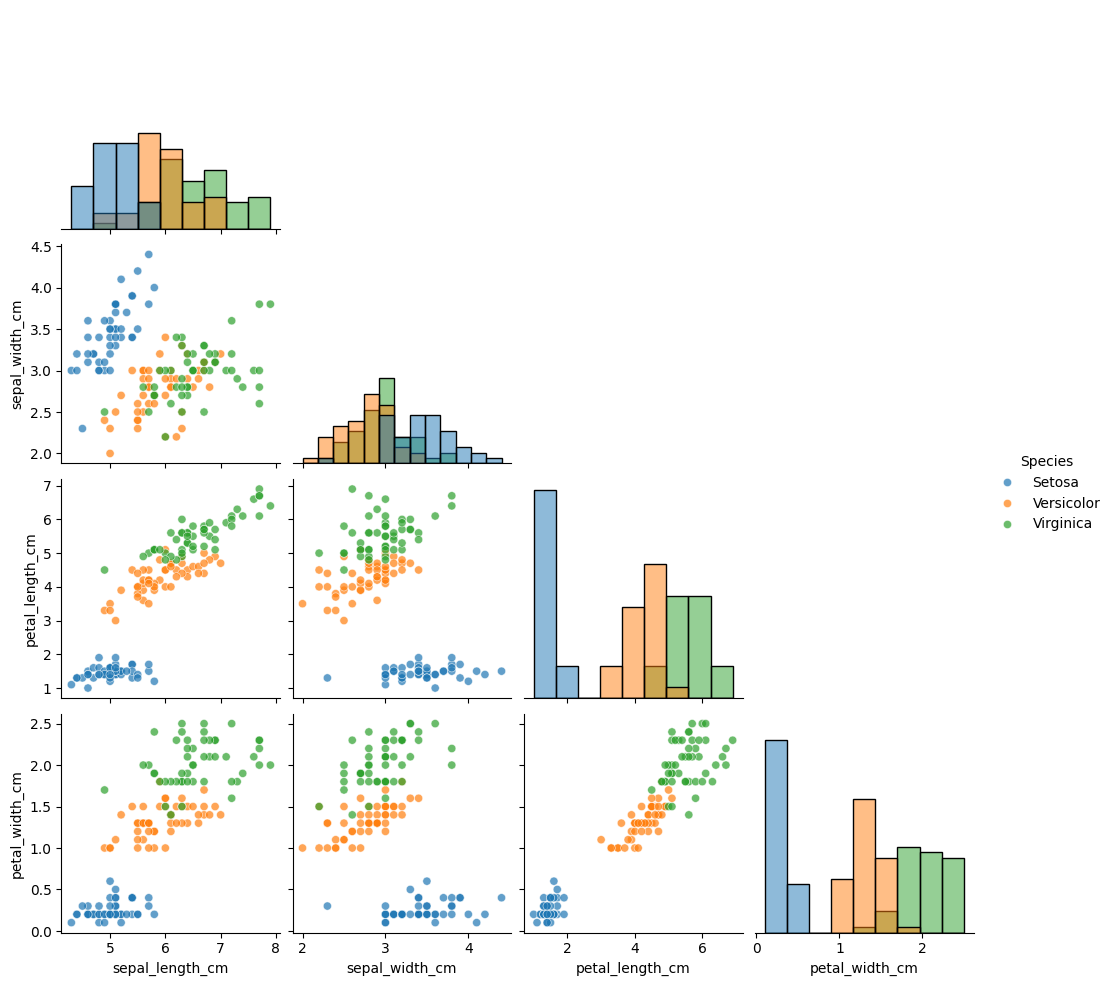

In [74]:
name_map = {
    v: k for k, v in mapping.items()
}
df['Species'] = df['class'].map(name_map).astype('category')

sns.pairplot(df, vars=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm'], hue='Species', corner=True, diag_kind='hist', plot_kws={'alpha':0.7,'s':35})

df = df.drop(columns = 'Species')

## Training LogReg with the the iris dataset
2) Using Logistic Regression, classify the outcome (Column : 'Class') based on the labels (Columns :'sepal length /cm', 'sepal width /cm', 'petal length /cm', 'petal width /cm')
- a) Provide some values to predict the outcome
- b) Validate the model - print the confusion matrix and the accuracy score

In [75]:
logReg = LogisticRegression()
X = df.drop(columns='class')
y = df['class']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
logReg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [76]:
# predict outcome
y_pred = logReg.predict(X_test)
print('Predicted Y values: \n', pd.DataFrame(y_pred))
print('Test Y values: \n', y_test)

Predicted Y values: 
        0
0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
..   ...
111  2.0
112  1.0
113  0.0
114  2.0
115  1.0

[116 rows x 1 columns]
Test Y values: 
 9      0
4      0
26     0
120    1
125    1
      ..
71     2
106    1
14     0
92     2
102    1
Name: class, Length: 116, dtype: Int64


### evaluating its predictive performance

In [77]:
score = accuracy_score(y_test, y_pred)
print(f'Validating the model: \n {score*100:.5f}%')


Validating the model: 
 97.41379%


In [78]:
confusionMatrix = confusion_matrix(y_test, y_pred)
labels = ['Setosa', 'Versicolor', 'Virginica']
col = [f'{label}_pred' for label in labels]
idx = [f'{label}_true' for label in labels]
cm_df = pd.DataFrame(confusionMatrix, columns = col, index = idx)
print(cm_df)

                 Setosa_pred  Versicolor_pred  Virginica_pred
Setosa_true               37                0               0
Versicolor_true            0               38               1
Virginica_true             0                2              38


3) Redo the above steps with any two **features
- a) Compare the accuracy score with the model built in the above with four features

In [79]:
# instantiating logistic regressor and its X and y values
logReg = LogisticRegression()
X = df.drop(columns=['class', 'sepal_width_cm', 'petal_width_cm'])
y = df['class']

# split for training and testing sets
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
logReg.fit(X_train, y_train)

# evaluating its predictive performance
y_pred = logReg.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Validating the model: \n {score*100:.3f}%')

Validating the model: 
 96.552%
